# Анализ данных фармацевтической компании

1. Предоставить отчет за апрель  в формате excel-таблицы:  а) в разрезе аптек со следующими полям: номер аптеки, наименование аптеки, территориальное управление, выручка (продажей является только чек продажи), кол-во чеков, кол-во упаковок, средний чек, сумма продаж товара дня (выручка), остаток товара на конец месяца (все склады), б) в разрезе территориальных управлений (ТУ1, ТУ2 ...) со следующими полям: территориальное управление, выручка (продажей является только чек продажи), кол-во чеков, кол-во упаковок, средний чек, сумма продаж товара дня (выручка), остаток товара на конец месяца (все склады)
2. Проанализировать остатки товара дня и определить целесообразность и кол-во закупки данных препаратов на май 2021
3. Предоставить отчет по срокам годности по всей сети (без разбивки по аптекам и складам) следующего вида
4. Проверить наличие минимального ассортимента в аптеках №1 и 266 (минимальный ассортимент аптек и аптечных пунктов разный, см. справочную информацию)
5. Проанализировать продажи по категориям товара (категория товара, сумма в закупочных ценах, сумма в розничных ценах, наценка, средняя стоимость упаковки), определить ТОП-3 категорий товара по сумме продаж  и по кол-ву проданных упаковок
6. Оформить данные по ключевым показателям продаж в разрезе территориальных управлений в виде презентации в Power Point 


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:

excel_reader = pd.ExcelFile('C:\\Users\\Sergey\\Тестовое_задание+справочная_информация.xlsx')

pharmacy = excel_reader.parse('Аптеки') 


pharmacy.head(10)

,Наименование аптеки,Территориальное управление
0,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ТУ 3
1,ГБУ МО «Мособлмедсервис» №002 Аптека г.Климовс...,ТУ 5
2,ГБУ МО «Мособлмедсервис» №003 Аптечный пункт г...,ТУ 7
3,ГБУ МО «Мособлмедсервис» №004 Аптека гп.Запруд...,ТУ 7
4,ГБУ МО «Мособлмедсервис» №005 Аптека г. Воскре...,ТУ 4
5,ГБУ МО «Мособлмедсервис» №006 Аптека г. Подоль...,ТУ 5
6,"ГБУ МО «Мособлмедсервис» №008 Ап/п г.Пушкино,м...",ТУ 1
7,ГБУ МО «Мособлмедсервис» №009 Ап/п Пушкинский ...,ТУ 1
8,ГБУ МО «Мособлмедсервис» №010 Аптечный пункт Л...,ТУ 4
9,ГБУ МО «Мособлмедсервис» №011 Аптечный пункт В...,ТУ 4


In [160]:
status_pharmacy_pharmacy_point = excel_reader.parse('Статус аптека_апт.пункт')

status_pharmacy_pharmacy_point.head(10)

,Аптека,Статус
0,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,аптечный пункт
1,ГБУ МО «Мособлмедсервис» №002 Аптека г.Климовс...,аптечный пункт
2,ГБУ МО «Мособлмедсервис» №003 Аптечный пункт г...,аптечный пункт
3,ГБУ МО «Мособлмедсервис» №004 Аптека гп.Запруд...,аптечный пункт
4,ГБУ МО «Мособлмедсервис» №005 Аптека г. Воскре...,аптечный пункт
5,ГБУ МО «Мособлмедсервис» №006 Аптека г. Подоль...,аптечный пункт
6,"ГБУ МО «Мособлмедсервис» №008 Ап/п г.Пушкино,м...",аптечный пункт
7,ГБУ МО «Мособлмедсервис» №009 Ап/п Пушкинский ...,аптечный пункт
8,ГБУ МО «Мособлмедсервис» №010 Аптечный пункт Л...,аптечный пункт
9,ГБУ МО «Мособлмедсервис» №011 Аптечный пункт В...,аптечный пункт


In [161]:
product_of_the_day = excel_reader.parse('Товар дня', header=1)

product_of_the_day.head(10)

,Код товара
0,3978358
1,8633588
2,7096778
3,1287428
4,2041768
5,8241878
6,8665708
7,4732388
8,7663938
9,8675048


In [162]:
product_of_the_day['Код товара']=product_of_the_day['Код товара'].astype(str)

In [163]:
# min_range_of_pharmacy - таблица с минимальным ассортиментом аптеки
min_range_of_pharmacy = excel_reader.parse('Мин.ассорт._аптеки', header=1)

min_range_of_pharmacy.head(10)

,Лекарственные препараты (МНН),Лекарственные формы,входит в мин. ассортимент
0,Аминофиллин,таблетки,да
1,Амлодипин,таблетки,да
2,Амоксициллин,капсулы или таблетки,да
3,Амоксициллин,порошок для приготовления суспензии для приема...,да
4,Аскорбиновая кислота,драже или таблетки,да
5,Атенолол,таблетки,да
6,Аторвастатин,"капсулы или таблетки, покрытые оболочкой или т...",да
7,Ацетилсалициловая кислота,таблетки,да
8,Ацетилцистеин,гранулы для приготовления раствора для приема ...,да
9,Ацикловир,крем для наружного применения или мазь для нар...,да


In [164]:
#min_range_of_pharmacy_items - минимальный ассортимент аптечного пункта

min_range_of_pharmacy_items = excel_reader.parse('Мин.ассорт._аптеч.пункт', header=1)

min_range_of_pharmacy_items.head(10)

,Лекарственные препараты (МНН),Лекарственные формы,входит в мин. ассортимент
0,Аскорбиновая кислота,драже или таблетки,да
1,Ацетилсалициловая кислота,таблетки,да
2,Ацетилцистеин,гранулы для приготовления раствора для приема ...,да
3,Бисакодил,суппозитории ректальные,да
4,Бисакодил,таблетки,да
5,Бифидобактерии бифидум,капсулы или порошок для приема внутрь,да
6,Висмута трикалия дицитрат,"таблетки, покрытые пленочной оболочкой",да
7,Гидрокортизон,крем для наружного применения или мазь для нар...,да
8,Диклофенак,капли глазные,да
9,Диклофенак,таблетки,да


In [165]:
#Продажи за апрель 2021

df = excel_reader.parse('Данные_1', header=1)

df.head(10)

,АПТЕКА,СКЛАД,ПОКУПАТЕЛЬ,НОМЕР ДОКУМЕНТА,ТИП ДОКУМЕНТА,ДАТА ДОКУМЕНТА,ВРЕМЯ ДОКУМЕНТА,КОД ТОВАРА,НАЗВАНИЕ ТОВАРА,ПРОИЗВОДИТЕЛЬ,...,СЕРИЯ,СРОК ГОДНОСТИ,ПОСТАВЩИК,КАТЕГОРИЯ ТОВАРА В ЕФАРМЕ,ПОДКАТЕГОРИЯ ТОВАРА В ЕФАРМЕ,НОМЕР ПОЗИЦИИ ДОКУМЕНТА,НЕЛИКВИД,НАРКОТИЧЕСКОЕ В-ВО,СТАВКА НДС РОЗНИЧНАЯ,СУММА НДС РОЗНИЧНАЯ
0,ГБУ МО «Мособлмедсервис»,ЦО ОСНОВНОЙ,"ГБУЗ МО ""Дмитровская областная больница""",1000/ВП-00001024,АКТ ВОЗВРАТА ОТ ПОКУПАТЕЛЯ,2021-04-29,0.570694,7780668,Маска медицинская 3х сл,Рехина ООО,...,42020,2025-04-01 00:00:00,Общество с ограниченной ответственностью Торго...,Изделия медицинского назначения,Маски лицевые защитные,30945,NaN,НЕТ,10,1363.6000
1,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,"ГБУЗ МО ""Каширская ЦРБ""",1000/ВП-00001022,АКТ ВОЗВРАТА ОТ ПОКУПАТЕЛЯ,2021-04-09,0.502465,1199128,Мексидол р-р в/в и в/м 50мг/мл 5мл №5,Фармасофт НПК ООО/Эллара МЦ ООО,...,641019,2022-10-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Нейротропные ср-ва.Ноотропы,30929,NaN,НЕТ,10,48.0455
2,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,1560118,Конкор таб. п.п.о. 10мг №50,Мерк Хелскеа КГаА/Нанолек ООО,...,A13720,2025-04-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Вегетотропные адренолитические ср-ва.Бета-адре...,219210,NaN,НЕТ,10,97.3454
3,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,1650938,Цитрамон П таб. №10,Фармстандарт-Лексредства ОАО,...,3730520,2024-06-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Ненаркотические анальгетики.Прочие,219215,NaN,НЕТ,10,34.5460
4,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,1730188,"Фастум гель 2,5% 30г №1",А.Менарини Мэнюфекчеринг Лоджистикс энд Сервис...,...,9158A,2024-09-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Ненаркотические анальгетики.НПВС - Производные...,219216,NaN,НЕТ,10,113.8180
5,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,2092388,Найз гель 1% 20г №1,Д-р Реддис Лабораторис Лтд,...,V9363,2021-10-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Ненаркотические анальгетики.Прочие,219211,NaN,НЕТ,10,104.0910
6,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,2956378,"Шприц СФМ 3х комп 10мл №5 (21G 0,8х40)",СФМ Госпиталь Продактс ГмбХ,...,200827,2025-07-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Изделия медицинского назначения,"Шприцы,иглы,системы д/переливания крови",219217,NaN,НЕТ,10,25.9090
7,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,3011578,Амлодипин таб. 5мг №30,Озон ООО,...,150620,2024-06-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Сердечно-сосудистые ср-ва.Блокаторы кальциевых...,219209,NaN,НЕТ,10,79.9090
8,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,3892308,Троксерутин гель 2% 40г,Озон ООО,...,1110420,2025-04-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Гематотропные ср-ва.Антикоагулянты,219214,NaN,НЕТ,10,48.0000
9,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,4205948,Таурин капли гл. 4% 10мл №1,Славянская Аптека ООО,...,251019,2022-10-01 00:00:00,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Офтальмологические ср-ва,219213,NaN,НЕТ,10,6.8180


In [166]:
df['КОД ТОВАРА']=df['КОД ТОВАРА'].astype(str)

In [167]:
#Остатки на 30 апреля

balances_as_of_April_30= excel_reader.parse('Данные_2', header=1)

balances_as_of_April_30.head(10)

,ДАТА ОСТАТКОВ,АПТЕКА,СКЛАД,КОД ТОВАРА,ТОВАР,МНН,ПРИЗНАК ПКУ,ЛЕК. СРЕДСТВО,ЖНВЛС,ДОЗИРОВКА,...,ПОДКАТЕГОРИЯ ТОВАРА В ЕФАРМЕ,БЫВШАЯ ЛЬГОТА,СКЛАД ОТ КОГО (ДЛЯ ПМП),СКЛАД КОМУ (ДЛЯ ПМП),ID_LOT,КОНТРАКТ,ПРИЗНАК КИЗ,МНОЖИТЕЛЬ,ЦЕНА РОЗНИЧНАЯ ЗА ЦЕЛУЮ УП,ОПИСАНИЕ МЕСТА ХРАНЕНИЯ
0,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,NaN,NaN,NaN,9801408,NaN,0,1,300.0,NaN
1,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,NaN,NaN,NaN,9726194,NaN,0,1,300.0,NaN
2,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000325277,*Масло какао 100 гр,NaN,0,0,0,NaN,...,NaN,NaN,NaN,NaN,9801410,NaN,0,1,371.0,NaN
3,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,1778958,L-Тироксин 75 Берлин-Хеми таб. 75мкг №100,Левотироксин натрия,0,1,1,75мкг,...,Гормоны и их антагонисты.Гормоны щитовидной же...,NaN,NaN,NaN,10138959,Договор от 21.12.2020 №15-ЛКПОД-20,1,1,137.6,"Хранить в сухом, защищенном от света, недоступ..."
4,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,4876328,Авиамарин таб. 50мг №10,Дименгидринат,0,1,0,50мг,...,Интермедианты.Антигистаминные ср-ва,NaN,NaN,NaN,10106778,Договор от 23.12.2020 №8-ЛКПОД-20,1,1,164.0,"В сухом, защищенном от света месте, при темпер..."
5,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,1827138,Адаптол таб. 500мг №20,Тетраметилтетраазабициклооктандион,0,1,0,500мг,...,Нейротропные ср-ва.Анксиолитики,NaN,NaN,NaN,9747929,Договор от 21.12.2020 №1-ЛКПОД-20,1,1,749.0,NaN
6,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,7794248,Аевит капс. 200мг №30,Витамин Е+Ретинол,0,1,0,200мг,...,Метаболики.Витамины и витаминоподобные ср-ва,NaN,NaN,NaN,10139958,Договор от 21.12.2020 №6-ЛКПОД-20,1,1,92.0,NaN
7,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,3414818,Азарга капли гл. 10мг+5мг 5мл №1,Бринзоламид+Тимолол,0,1,0,10мг+5мг 5мл,...,Офтальмологические ср-ва,NaN,NaN,NaN,10141178,Договор от 21.12.2020 №1-ЛКПОД-20,1,1,1154.0,"В сухом и защищенном от света,недоступном для ..."
8,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,6240998,Азбука здоровья карамель леденцовая с вит С ли...,NaN,0,0,0,леденцовая с вит С лимон-мята,...,"БАД витамины,минералы,витаминоподобные вещества",NaN,NaN,NaN,8772980,Договор от 13.01.2020 №11-АКОПТ-20,0,1,24.0,"Хранить в сухом, прохладном, защищенном от све..."
9,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,3537488,Азитромицин капс. 500мг №3,Азитромицин,0,1,1,500мг,...,Антибиотики.Макролиды и азалиды,NaN,NaN,NaN,10152096,Договор от 23.12.2020 №8-ЛКПОД-20,1,1,85.3,"Хранить в сухом, защищенном от света, недоступ..."


In [168]:
balances_as_of_April_30['КОД ТОВАРА']=balances_as_of_April_30['КОД ТОВАРА'].astype(str)

# Предобработка


In [169]:
pharmacy.info()
#Посчитаем количество пустых значений.
print('Количество пустых значений')
pharmacy.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Наименование аптеки         292 non-null    object
 1   Территориальное управление  292 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB
Количество пустых значений


Наименование аптеки           0
Территориальное управление    0
dtype: int64

In [170]:
pharmacy.columns = pharmacy.columns.str.lower()
pharmacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   наименование аптеки         292 non-null    object
 1   территориальное управление  292 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [171]:
status_pharmacy_pharmacy_point.info()
#Посчитаем количество пустых значений.
print('Количество пустых значений')
status_pharmacy_pharmacy_point.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Аптека  292 non-null    object
 1   Статус  292 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB
Количество пустых значений


Аптека    0
Статус    0
dtype: int64

In [172]:
status_pharmacy_pharmacy_point.columns = status_pharmacy_pharmacy_point.columns.str.lower()

status_pharmacy_pharmacy_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   аптека  292 non-null    object
 1   статус  292 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [173]:
product_of_the_day.info()
#Посчитаем количество пустых значений.
print('Количество пустых значений')
product_of_the_day.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Код товара  90 non-null     object
dtypes: object(1)
memory usage: 848.0+ bytes
Количество пустых значений


Код товара    0
dtype: int64

In [174]:
product_of_the_day.columns = product_of_the_day.columns.str.lower()
product_of_the_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   код товара  90 non-null     object
dtypes: object(1)
memory usage: 848.0+ bytes


In [175]:
min_range_of_pharmacy.info()
#Посчитаем количество пустых значений.
print('Количество пустых значений')
min_range_of_pharmacy.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Лекарственные препараты (МНН)  62 non-null     object
 1   Лекарственные формы            62 non-null     object
 2   входит в мин. ассортимент      62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
Количество пустых значений


Лекарственные препараты (МНН)    0
Лекарственные формы              0
входит в мин. ассортимент        0
dtype: int64

In [176]:
min_range_of_pharmacy.columns = min_range_of_pharmacy.columns.str.lower()
min_range_of_pharmacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   лекарственные препараты (мнн)  62 non-null     object
 1   лекарственные формы            62 non-null     object
 2   входит в мин. ассортимент      62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [177]:
min_range_of_pharmacy_items.info()
#Посчитаем количество пустых значений.
print('Количество пустых значений')
min_range_of_pharmacy_items.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Лекарственные препараты (МНН)  27 non-null     object
 1   Лекарственные формы            27 non-null     object
 2   входит в мин. ассортимент      27 non-null     object
dtypes: object(3)
memory usage: 776.0+ bytes
Количество пустых значений


Лекарственные препараты (МНН)    0
Лекарственные формы              0
входит в мин. ассортимент        0
dtype: int64

In [178]:
min_range_of_pharmacy_items.columns = min_range_of_pharmacy_items.columns.str.lower()
min_range_of_pharmacy_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   лекарственные препараты (мнн)  27 non-null     object
 1   лекарственные формы            27 non-null     object
 2   входит в мин. ассортимент      27 non-null     object
dtypes: object(3)
memory usage: 776.0+ bytes


In [179]:
df.info()
#Посчитаем количество пустых значений.
print('Количество пустых значений')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682267 entries, 0 to 682266
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   АПТЕКА                        682267 non-null  object        
 1   СКЛАД                         682267 non-null  object        
 2   ПОКУПАТЕЛЬ                    682267 non-null  object        
 3   НОМЕР ДОКУМЕНТА               682267 non-null  object        
 4   ТИП ДОКУМЕНТА                 682267 non-null  object        
 5   ДАТА ДОКУМЕНТА                682267 non-null  datetime64[ns]
 6   ВРЕМЯ ДОКУМЕНТА               682267 non-null  float64       
 7   КОД ТОВАРА                    682267 non-null  object        
 8   НАЗВАНИЕ ТОВАРА               682267 non-null  object        
 9   ПРОИЗВОДИТЕЛЬ                 682267 non-null  object        
 10  МНН                           505266 non-null  object        
 11  КОЛИЧЕСТВО   

АПТЕКА                               0
СКЛАД                                0
ПОКУПАТЕЛЬ                           0
НОМЕР ДОКУМЕНТА                      0
ТИП ДОКУМЕНТА                        0
ДАТА ДОКУМЕНТА                       0
ВРЕМЯ ДОКУМЕНТА                      0
КОД ТОВАРА                           0
НАЗВАНИЕ ТОВАРА                      0
ПРОИЗВОДИТЕЛЬ                        0
МНН                             177001
КОЛИЧЕСТВО                           0
СУММА ПОСТАВЩИКА                     0
СУММА РОЗНИЧНАЯ                      0
СКИДКА                               0
СЕРИЯ                            23799
СРОК ГОДНОСТИ                        2
ПОСТАВЩИК                            0
КАТЕГОРИЯ ТОВАРА В ЕФАРМЕ         6945
ПОДКАТЕГОРИЯ ТОВАРА В ЕФАРМЕ      8002
НОМЕР ПОЗИЦИИ ДОКУМЕНТА              0
НЕЛИКВИД                        677278
НАРКОТИЧЕСКОЕ В-ВО                   0
СТАВКА НДС РОЗНИЧНАЯ                 0
СУММА НДС РОЗНИЧНАЯ                  0
dtype: int64

In [180]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682267 entries, 0 to 682266
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   аптека                        682267 non-null  object        
 1   склад                         682267 non-null  object        
 2   покупатель                    682267 non-null  object        
 3   номер документа               682267 non-null  object        
 4   тип документа                 682267 non-null  object        
 5   дата документа                682267 non-null  datetime64[ns]
 6   время документа               682267 non-null  float64       
 7   код товара                    682267 non-null  object        
 8   название товара               682267 non-null  object        
 9   производитель                 682267 non-null  object        
 10  мнн                           505266 non-null  object        
 11  количество   

In [181]:
balances_as_of_April_30.info()
#Посчитаем количество пустых значений.
print('Количество пустых значений')
balances_as_of_April_30.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288276 entries, 0 to 288275
Data columns (total 45 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   ДАТА ОСТАТКОВ                 288276 non-null  object        
 1   АПТЕКА                        288276 non-null  object        
 2   СКЛАД                         288276 non-null  object        
 3   КОД ТОВАРА                    288276 non-null  object        
 4   ТОВАР                         288276 non-null  object        
 5   МНН                           233345 non-null  object        
 6   ПРИЗНАК ПКУ                   288276 non-null  int64         
 7   ЛЕК. СРЕДСТВО                 288276 non-null  int64         
 8   ЖНВЛС                         288276 non-null  int64         
 9   ДОЗИРОВКА                     228473 non-null  object        
 10  ФАСОВКА                       288276 non-null  int64         
 11  ФОРМА ВЫПУСКА

ДАТА ОСТАТКОВ                        0
АПТЕКА                               0
СКЛАД                                0
КОД ТОВАРА                           0
ТОВАР                                0
МНН                              54931
ПРИЗНАК ПКУ                          0
ЛЕК. СРЕДСТВО                        0
ЖНВЛС                                0
ДОЗИРОВКА                        59803
ФАСОВКА                              0
ФОРМА ВЫПУСКА                    37017
ПРОИЗВОДИТЕЛЬ                        0
ДЕЛИТЕЛЬ                             0
ПОСТАВЩИК                            0
СРОК ГОДНОСТИ                        1
СЕРИЯ                             1503
СТРАНА                               6
ВНУТРЕННИЙ ШК                        0
ДАТА ДОКУМЕНТА ПАРТИИ                0
ДОКУМЕНТ ПАРТИИ                      0
КОЛИЧЕСТВО                           0
РЕЗЕРВ                               0
ОБЩИЙ ОСТАТОК                        0
ОБЩИЙ ОСТАТОК В ЦЕЛЫХ УП.            0
ЦЕНА ЗАКУПКИ             

In [182]:
balances_as_of_April_30.columns = balances_as_of_April_30.columns.str.lower()
balances_as_of_April_30

,дата остатков,аптека,склад,код товара,товар,мнн,признак пку,лек. средство,жнвлс,дозировка,...,подкатегория товара в ефарме,бывшая льгота,склад от кого (для пмп),склад кому (для пмп),id_lot,контракт,признак киз,множитель,цена розничная за целую уп,описание места хранения
0,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,NaN,NaN,NaN,9801408,NaN,0,1,300.0,NaN
1,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,NaN,NaN,NaN,9726194,NaN,0,1,300.0,NaN
2,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000325277,*Масло какао 100 гр,NaN,0,0,0,NaN,...,NaN,NaN,NaN,NaN,9801410,NaN,0,1,371.0,NaN
3,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,1778958,L-Тироксин 75 Берлин-Хеми таб. 75мкг №100,Левотироксин натрия,0,1,1,75мкг,...,Гормоны и их антагонисты.Гормоны щитовидной же...,NaN,NaN,NaN,10138959,Договор от 21.12.2020 №15-ЛКПОД-20,1,1,137.6,"Хранить в сухом, защищенном от света, недоступ..."
4,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,4876328,Авиамарин таб. 50мг №10,Дименгидринат,0,1,0,50мг,...,Интермедианты.Антигистаминные ср-ва,NaN,NaN,NaN,10106778,Договор от 23.12.2020 №8-ЛКПОД-20,1,1,164.0,"В сухом, защищенном от света месте, при темпер..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288271,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,4964438,Эффералган супп. рект. 80мг №12,Парацетамол,0,1,1,80мг,...,Ненаркотические анальгетики.Анилиды,NaN,NaN,NaN,9661963,Договор от 21.12.2020 №6-ЛКПОД-20,0,1,98.8,"Хранить в сухом, защищенном от света, недоступ..."
288272,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,1182188,Эхинацея настойка 50мл,Эхинацеи пурпурной травы экстракт,0,1,0,NaN,...,Иммунотропные ср-ва.Иммуномодуляторы 1,NaN,NaN,NaN,9928849,Договор от 10.01.2020 №8-АКОПЛ-20,0,1,130.0,"Хранить в сухом, защищенном от света, недоступ..."
288273,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,7395398,Юнидокс солютаб таб. дисперг. 100мг №20,Доксициклин,0,1,1,100мг,...,Антибиотики.Тетрациклины,NaN,NaN,NaN,10155957,Договор от 10.01.2020 №8-АКОПЛ-20,0,1,658.1,NaN
288274,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,5274348,"Янтарная кислота Квадрат-С таб. 0,5г №10",NaN,0,0,0,NaN,...,"БАД общеукрепляющие, д/иммунной системы, повыш...",NaN,NaN,NaN,10155576,Договор от 13.01.2020 №6-АКОПТ-20,0,1,11.0,NaN


Вроде все загрузилось, сильных проблем нет

In [183]:
#в таблице с аптеками выделим некоторые данные путем разделения столбцов
pharmacy['наименование аптеки'] = pharmacy['наименование аптеки'].replace('Аптечный пункт', 'Аптечный_пункт', regex=True)

pharmacy[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']] = pharmacy['наименование аптеки'].str.split(' ', expand=True)
pharmacy['организация'] = pharmacy['1'] + ' ' + pharmacy['2'] + ' ' + pharmacy['3']
pharmacy =  pharmacy.drop(['1', '2', '3', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], axis=1)
pharmacy = pharmacy.rename(columns={'4': 'номер аптеки'})
pharmacy = pharmacy.rename(columns={'5': 'статус'})
pharmacy

,наименование аптеки,территориальное управление,номер аптеки,статус,организация
0,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,№001,Аптечный_пункт,ГБУ МО «Мособлмедсервис»
1,ГБУ МО «Мособлмедсервис» №002 Аптека г.Климовс...,ТУ 5,№002,Аптека,ГБУ МО «Мособлмедсервис»
2,ГБУ МО «Мособлмедсервис» №003 Аптечный_пункт г...,ТУ 7,№003,Аптечный_пункт,ГБУ МО «Мособлмедсервис»
3,ГБУ МО «Мособлмедсервис» №004 Аптека гп.Запруд...,ТУ 7,№004,Аптека,ГБУ МО «Мособлмедсервис»
4,ГБУ МО «Мособлмедсервис» №005 Аптека г. Воскре...,ТУ 4,№005,Аптека,ГБУ МО «Мособлмедсервис»
...,...,...,...,...,...
287,"ГБУ МО «Мособлмедсервис» №341 Аптека МО, г. Хи...",ТУ 7,№341,Аптека,ГБУ МО «Мособлмедсервис»
288,"ГБУ МО «Мособлмедсервис» №342 Аптека МО, г. Ба...",ТУ 2,№342,Аптека,ГБУ МО «Мособлмедсервис»
289,ГБУ МО «Мособлмедсервис» №343 Аптечный_пункт М...,ТУ 5,№343,Аптечный_пункт,ГБУ МО «Мособлмедсервис»
290,ГБУ МО «Мособлмедсервис» №344 Аптечный_пункт М...,ТУ 5,№344,Аптечный_пункт,ГБУ МО «Мособлмедсервис»


In [184]:
pharmacy[['1', '2', '3', '4', '5', '6']] = pharmacy['наименование аптеки'].str.split(' ', n=5, expand=True)
pharmacy =  pharmacy.drop(['1', '2', '3', '4', '5'], axis=1)
pharmacy = pharmacy.rename(columns={'6': 'адрес'})
pharmacy

,наименование аптеки,территориальное управление,номер аптеки,статус,организация,адрес
0,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,№001,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г. Люберцы, ул. Назаровская, д.3"
1,ГБУ МО «Мособлмедсервис» №002 Аптека г.Климовс...,ТУ 5,№002,Аптека,ГБУ МО «Мособлмедсервис»,"г.Климовск, ул.Советская, 14"
2,ГБУ МО «Мособлмедсервис» №003 Аптечный_пункт г...,ТУ 7,№003,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"гп.Запрудня, ул.Карла Маркса, д.14"
3,ГБУ МО «Мособлмедсервис» №004 Аптека гп.Запруд...,ТУ 7,№004,Аптека,ГБУ МО «Мособлмедсервис»,"гп.Запрудня,ул.Первомайская,д.4б"
4,ГБУ МО «Мособлмедсервис» №005 Аптека г. Воскре...,ТУ 4,№005,Аптека,ГБУ МО «Мособлмедсервис»,"г. Воскресенск, Больничный проезд, д.1, корп.2"
...,...,...,...,...,...,...
287,"ГБУ МО «Мособлмедсервис» №341 Аптека МО, г. Хи...",ТУ 7,№341,Аптека,ГБУ МО «Мособлмедсервис»,"МО, г. Химки, ул. Молодежная, д.64, стр.1"
288,"ГБУ МО «Мособлмедсервис» №342 Аптека МО, г. Ба...",ТУ 2,№342,Аптека,ГБУ МО «Мособлмедсервис»,"МО, г. Балашиха мкр. Павлино, ул. Троицкая, д.3"
289,ГБУ МО «Мособлмедсервис» №343 Аптечный_пункт М...,ТУ 5,№343,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г.о. Подольск, ул. Кирова, д. 27"
290,ГБУ МО «Мособлмедсервис» №344 Аптечный_пункт М...,ТУ 5,№344,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г.о. Подольск, пос. Подольской МИС, д. 9"


In [185]:
#в таблице с аптеками выделим некоторые данные путем разделения столбцов
df['аптека'] = df['аптека'].replace('Аптечный пункт', 'Аптечный_пункт', regex=True)

df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']] = df['аптека'].str.split(' ', expand=True)
df['организация'] = df['1'] + ' ' + df['2'] + ' ' + df['3']
df =  df.drop(['1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], axis=1)
df = df.rename(columns={'4': 'номер аптеки'})

df[['1', '2', '3', '4', '5', '6']] = df['аптека'].str.split(' ', n=5, expand=True)
df =  df.drop(['1', '2', '3', '4', '5', '6'], axis=1)

df

,аптека,склад,покупатель,номер документа,тип документа,дата документа,время документа,код товара,название товара,производитель,...,поставщик,категория товара в ефарме,подкатегория товара в ефарме,номер позиции документа,неликвид,наркотическое в-во,ставка ндс розничная,сумма ндс розничная,номер аптеки,организация
0,ГБУ МО «Мособлмедсервис»,ЦО ОСНОВНОЙ,"ГБУЗ МО ""Дмитровская областная больница""",1000/ВП-00001024,АКТ ВОЗВРАТА ОТ ПОКУПАТЕЛЯ,2021-04-29,0.570694,7780668,Маска медицинская 3х сл,Рехина ООО,...,Общество с ограниченной ответственностью Торго...,Изделия медицинского назначения,Маски лицевые защитные,30945,NaN,НЕТ,10,1363.6000,None,ГБУ МО «Мособлмедсервис»
1,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,"ГБУЗ МО ""Каширская ЦРБ""",1000/ВП-00001022,АКТ ВОЗВРАТА ОТ ПОКУПАТЕЛЯ,2021-04-09,0.502465,1199128,Мексидол р-р в/в и в/м 50мг/мл 5мл №5,Фармасофт НПК ООО/Эллара МЦ ООО,...,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Нейротропные ср-ва.Ноотропы,30929,NaN,НЕТ,10,48.0455,None,ГБУ МО «Мособлмедсервис»
2,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,1560118,Конкор таб. п.п.о. 10мг №50,Мерк Хелскеа КГаА/Нанолек ООО,...,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Вегетотропные адренолитические ср-ва.Бета-адре...,219210,NaN,НЕТ,10,97.3454,None,ГБУ МО «Мособлмедсервис»
3,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,1650938,Цитрамон П таб. №10,Фармстандарт-Лексредства ОАО,...,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Ненаркотические анальгетики.Прочие,219215,NaN,НЕТ,10,34.5460,None,ГБУ МО «Мособлмедсервис»
4,ГБУ МО «Мособлмедсервис»,ЦО ФАПы,Отделение общей врачебной практики Алфимово,10001000_10/РН-00004121,РАСХОДНАЯ НАКЛАДНАЯ,2021-04-12,0.395556,1730188,"Фастум гель 2,5% 30г №1",А.Менарини Мэнюфекчеринг Лоджистикс энд Сервис...,...,АВЕСТА ФАРМАЦЕВТИКА ООО,Лек. средства,Ненаркотические анальгетики.НПВС - Производные...,219216,NaN,НЕТ,10,113.8180,None,ГБУ МО «Мособлмедсервис»
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682262,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,покупатели розничной торговли,18646375,ЧЕК ПРОДАЖИ,2021-04-30,0.802280,1152158,"Левомеколь мазь 40мг/г+7,5мг/г 40г №1",Нижфарм АО,...,Пульс,Лек. средства,Синтетические антибактериальные ср-ва 1,34695955,NaN,НЕТ,10,15.5454,№347,ГБУ МО «Мособлмедсервис»
682263,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,покупатели розничной торговли,18646375,ЧЕК ПРОДАЖИ,2021-04-30,0.802280,1180408,Ундевит др. №50,Алтайвитамины АО,...,Пульс,Лек. средства,Метаболики.Витамины и витаминоподобные ср-ва,34695953,NaN,НЕТ,10,4.5454,№347,ГБУ МО «Мособлмедсервис»
682264,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,покупатели розничной торговли,18646375,ЧЕК ПРОДАЖИ,2021-04-30,0.802280,3935358,Перчатки хирургические латекс нестер опудр ана...,СФМ Госпиталь Продактс ГмбХ,...,АВЕСТА ФАРМАЦЕВТИКА ООО,Изделия медицинского назначения,Перчатки медицинские,34695952,NaN,НЕТ,10,3.0000,№347,ГБУ МО «Мособлмедсервис»
682265,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,покупатели розничной торговли,18646375,ЧЕК ПРОДАЖИ,2021-04-30,0.802280,6723258,Перекись водорода р-р дезинфицирующий 3% 200мл,Самарская ФФ,...,Протек,Товары санитарии и личной гигиены,Дезинфицирующие средства (не лечебные),34695951,NaN,НЕТ,20,9.1666,№347,ГБУ МО «Мособлмедсервис»


In [186]:
#в таблице с аптеками выделим некоторые данные путем разделения столбцов
balances_as_of_April_30['аптека'] = balances_as_of_April_30['аптека'].replace('Аптечный пункт', 'Аптечный_пункт', regex=True)

balances_as_of_April_30[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']] = balances_as_of_April_30['аптека'].str.split(' ', expand=True)
balances_as_of_April_30['организация'] = balances_as_of_April_30['1'] + ' ' + balances_as_of_April_30['2'] + ' ' + balances_as_of_April_30['3']
balances_as_of_April_30 =  balances_as_of_April_30.drop(['1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], axis=1)
balances_as_of_April_30 = balances_as_of_April_30.rename(columns={'4': 'номер аптеки'})

balances_as_of_April_30[['1', '2', '3', '4', '5', '6']] = balances_as_of_April_30['аптека'].str.split(' ', n=5, expand=True)
balances_as_of_April_30 =  balances_as_of_April_30.drop(['1', '2', '3', '4', '5', '6'], axis=1)

balances_as_of_April_30

,дата остатков,аптека,склад,код товара,товар,мнн,признак пку,лек. средство,жнвлс,дозировка,...,склад от кого (для пмп),склад кому (для пмп),id_lot,контракт,признак киз,множитель,цена розничная за целую уп,описание места хранения,номер аптеки,организация
0,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,NaN,9801408,NaN,0,1,300.0,NaN,№001,ГБУ МО «Мособлмедсервис»
1,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,NaN,9726194,NaN,0,1,300.0,NaN,№001,ГБУ МО «Мособлмедсервис»
2,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000325277,*Масло какао 100 гр,NaN,0,0,0,NaN,...,NaN,NaN,9801410,NaN,0,1,371.0,NaN,№001,ГБУ МО «Мособлмедсервис»
3,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,1778958,L-Тироксин 75 Берлин-Хеми таб. 75мкг №100,Левотироксин натрия,0,1,1,75мкг,...,NaN,NaN,10138959,Договор от 21.12.2020 №15-ЛКПОД-20,1,1,137.6,"Хранить в сухом, защищенном от света, недоступ...",№001,ГБУ МО «Мособлмедсервис»
4,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,4876328,Авиамарин таб. 50мг №10,Дименгидринат,0,1,0,50мг,...,NaN,NaN,10106778,Договор от 23.12.2020 №8-ЛКПОД-20,1,1,164.0,"В сухом, защищенном от света месте, при темпер...",№001,ГБУ МО «Мособлмедсервис»
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288271,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,4964438,Эффералган супп. рект. 80мг №12,Парацетамол,0,1,1,80мг,...,NaN,NaN,9661963,Договор от 21.12.2020 №6-ЛКПОД-20,0,1,98.8,"Хранить в сухом, защищенном от света, недоступ...",№347,ГБУ МО «Мособлмедсервис»
288272,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,1182188,Эхинацея настойка 50мл,Эхинацеи пурпурной травы экстракт,0,1,0,NaN,...,NaN,NaN,9928849,Договор от 10.01.2020 №8-АКОПЛ-20,0,1,130.0,"Хранить в сухом, защищенном от света, недоступ...",№347,ГБУ МО «Мособлмедсервис»
288273,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,7395398,Юнидокс солютаб таб. дисперг. 100мг №20,Доксициклин,0,1,1,100мг,...,NaN,NaN,10155957,Договор от 10.01.2020 №8-АКОПЛ-20,0,1,658.1,NaN,№347,ГБУ МО «Мособлмедсервис»
288274,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,5274348,"Янтарная кислота Квадрат-С таб. 0,5г №10",NaN,0,0,0,NaN,...,NaN,NaN,10155576,Договор от 13.01.2020 №6-АКОПТ-20,0,1,11.0,NaN,№347,ГБУ МО «Мособлмедсервис»


# Задание 1

In [187]:
product_of_the_day['статус товара'] = 'Товар дня'
product_of_the_day

,код товара,статус товара
0,3978358,Товар дня
1,8633588,Товар дня
2,7096778,Товар дня
3,1287428,Товар дня
4,2041768,Товар дня
...,...,...
85,8676698,Товар дня
86,4963728,Товар дня
87,6753518,Товар дня
88,8343148,Товар дня


In [188]:
join = df.merge(pharmacy, left_on='номер аптеки', right_on='номер аптеки', how='left')
join=join[join['тип документа']=='ЧЕК ПРОДАЖИ']
join = join.merge(product_of_the_day, on='код товара', how='left')
join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681519 entries, 0 to 681518
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   аптека                        681519 non-null  object        
 1   склад                         681519 non-null  object        
 2   покупатель                    681519 non-null  object        
 3   номер документа               681519 non-null  object        
 4   тип документа                 681519 non-null  object        
 5   дата документа                681519 non-null  datetime64[ns]
 6   время документа               681519 non-null  float64       
 7   код товара                    681519 non-null  object        
 8   название товара               681519 non-null  object        
 9   производитель                 681519 non-null  object        
 10  мнн                           504924 non-null  object        
 11  количество   

In [189]:
#посчитаем продажи в разрезе аптек 
pivot_df = join.pivot_table(index=['аптека', 'номер аптеки', 'территориальное управление'],
                            values=['сумма розничная'],
                            aggfunc={'сумма розничная': ['sum', 'mean']}
                           )
#pivot_df = pivot_df.droplevel('СУММА РОЗНИЧНАЯ')
#pivot_df = pivot_df.rename(columns={('СУММА РОЗНИЧНАЯ', 'mean'): 'Средняя сумма чека'})
pivot_df.reset_index(inplace=True)
pivot_df = pivot_df.sort_values(by=('сумма розничная', 'sum'), ascending=False)

pivot_df.to_excel (r'C:\\Users\\Sergey\\Сумма продаж.xlsx')
pivot_df=pivot_df.head(10)

<ipython-input-189-20c410494cbd>:11: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pivot_df.to_excel (r'C:\\Users\\Sergey\\Сумма продаж.xlsx')


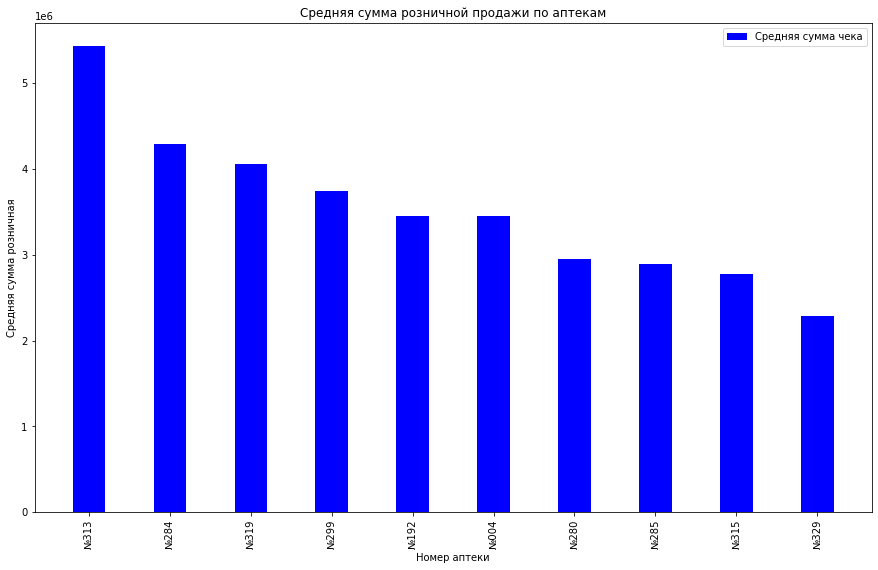

In [190]:

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем ось для графика
ax = plt.gca()

# Определяем ширину столбца
width = 0.4

# Создаем столбчатую диаграмму для средней розничной суммы
ax.bar(pivot_df['номер аптеки'], pivot_df[('сумма розничная', 'sum')], color='b', width=width, label='Средняя сумма чека', align='center')

# Устанавливаем метки для оси X с учетом сдвига
ax.set_xticks(pivot_df['номер аптеки'])
ax.set_xticklabels(pivot_df['номер аптеки'], rotation=90)

# Добавляем заголовок и метки осей
plt.title('Средняя сумма розничной продажи по аптекам')
ax.set_xlabel('Номер аптеки')
ax.set_ylabel('Средняя сумма розничная')

# Добавляем легенду
ax.legend()

# Отображаем диаграмму
plt.show()


In [191]:
pivot_df = join.pivot_table(index=['аптека', 'номер аптеки', 'территориальное управление'],
                            values=['тип документа'],
                            aggfunc={'тип документа': 'count'}).reset_index()
pivot_df = pivot_df.rename(columns={'тип документа': 'количество чеков'})
pivot_df = pivot_df.sort_values(by='количество чеков', ascending=False)
pivot_df.to_excel (r'C:\\Users\\Sergey\\Количество чеков.xlsx')
pivot_df
pivot_df=pivot_df.head(10)


<ipython-input-191-b105382d8fe3>:6: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pivot_df.to_excel (r'C:\\Users\\Sergey\\Количество чеков.xlsx')


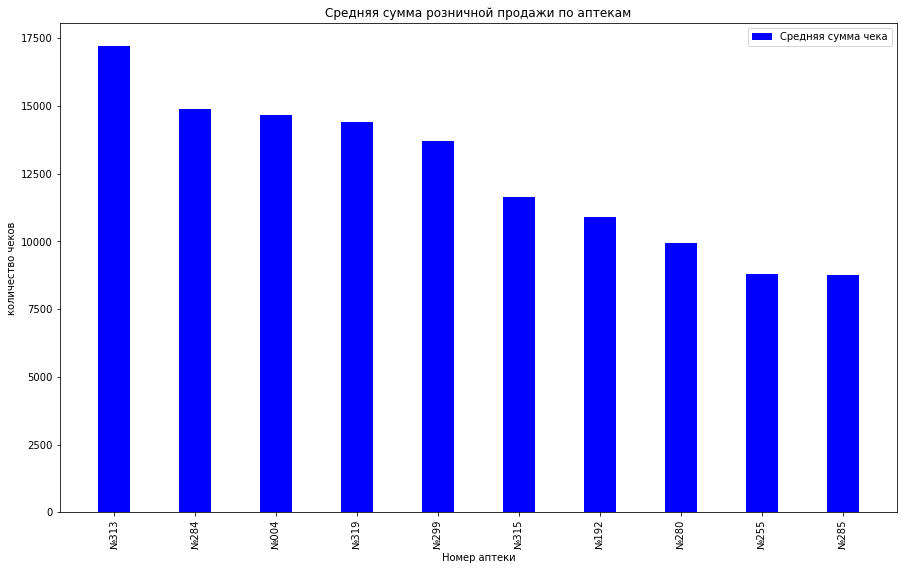

In [192]:

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем ось для графика
ax = plt.gca()

# Определяем ширину столбца
width = 0.4

# Создаем столбчатую диаграмму для средней розничной суммы
ax.bar(pivot_df['номер аптеки'], pivot_df['количество чеков'], color='b', width=width, label='Средняя сумма чека', align='center')

# Устанавливаем метки для оси X с учетом сдвига
ax.set_xticks(pivot_df['номер аптеки'])
ax.set_xticklabels(pivot_df['номер аптеки'], rotation=90)

# Добавляем заголовок и метки осей
plt.title('Средняя сумма розничной продажи по аптекам')
ax.set_xlabel('Номер аптеки')
ax.set_ylabel('количество чеков')

# Добавляем легенду
ax.legend()

# Отображаем диаграмму
plt.show()


In [193]:
pivot_df = join.pivot_table(index=['аптека', 'номер аптеки', 'территориальное управление'],
                            values=["количество"],
                            aggfunc={'количество': 'sum'}).reset_index()
pivot_df = pivot_df.rename(columns={'количество': 'количество упаковок'})
pivot_df = pivot_df.sort_values(by='количество упаковок', ascending=False)
pivot_df.to_excel (r'C:\\Users\\Sergey\\количество упаковок.xlsx')
pivot_df=pivot_df.head(10)
pivot_df

<ipython-input-193-4ff23671c72d>:6: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pivot_df.to_excel (r'C:\\Users\\Sergey\\количество упаковок.xlsx')


,аптека,номер аптеки,территориальное управление,количество упаковок
261,"ГБУ МО «Мособлмедсервис» №313 Аптека МО, г. Ис...",№313,ТУ 6,23551.80
3,ГБУ МО «Мособлмедсервис» №004 Аптека гп.Запруд...,№004,ТУ 7,22385.24
267,"ГБУ МО «Мособлмедсервис» №319 Аптека МО, г. Че...",№319,ТУ 5,20466.69
238,"ГБУ МО «Мособлмедсервис» №284 Аптека МО, г.Пущ...",№284,ТУ 5,19610.34
249,"ГБУ МО «Мособлмедсервис» №299 Аптека МО, г.Про...",№299,ТУ 5,19343.34
263,"ГБУ МО «Мособлмедсервис» №315 Аптека МО, г.Эле...",№315,ТУ 2,16603.76
165,ГБУ МО «Мособлмедсервис» №192 Аптечный_пункт М...,№192,ТУ 6,16276.51
234,"ГБУ МО «Мособлмедсервис» №280 Аптека МО, с. Па...",№280,ТУ 6,14951.76
239,"ГБУ МО «Мособлмедсервис» №285 Аптека МО, г. Од...",№285,ТУ 6,13699.53
216,"ГБУ МО «Мособлмедсервис» №255 Аптека МО, г. Се...",№255,ТУ 1,12945.07


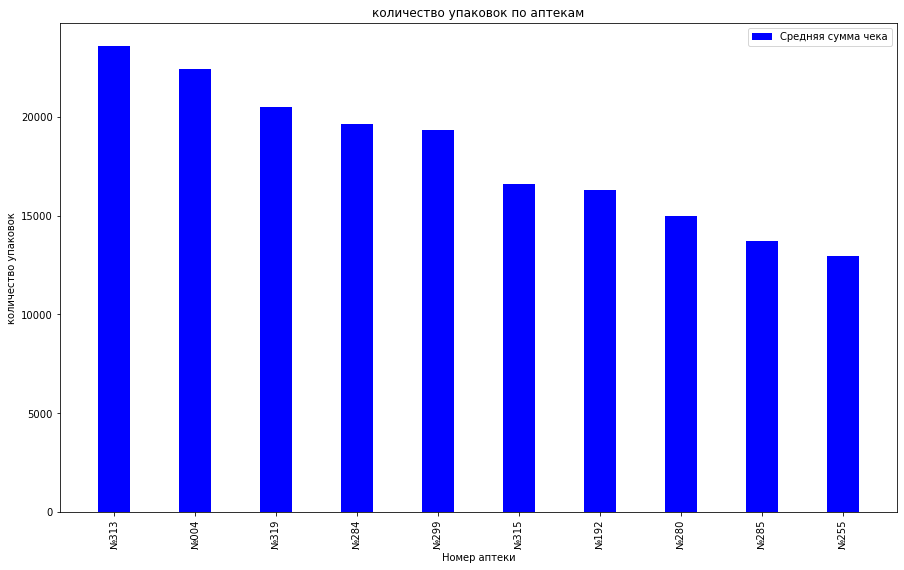

In [194]:

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем ось для графика
ax = plt.gca()

# Определяем ширину столбца
width = 0.4

# Создаем столбчатую диаграмму для средней розничной суммы
ax.bar(pivot_df['номер аптеки'], pivot_df['количество упаковок'], color='b', width=width, label='Средняя сумма чека', align='center')

# Устанавливаем метки для оси X с учетом сдвига
ax.set_xticks(pivot_df['номер аптеки'])
ax.set_xticklabels(pivot_df['номер аптеки'], rotation=90)

# Добавляем заголовок и метки осей
plt.title('количество упаковок по аптекам')
ax.set_xlabel('Номер аптеки')
ax.set_ylabel('количество упаковок')

# Добавляем легенду
ax.legend()

# Отображаем диаграмму
plt.show()


In [195]:
join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681519 entries, 0 to 681518
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   аптека                        681519 non-null  object        
 1   склад                         681519 non-null  object        
 2   покупатель                    681519 non-null  object        
 3   номер документа               681519 non-null  object        
 4   тип документа                 681519 non-null  object        
 5   дата документа                681519 non-null  datetime64[ns]
 6   время документа               681519 non-null  float64       
 7   код товара                    681519 non-null  object        
 8   название товара               681519 non-null  object        
 9   производитель                 681519 non-null  object        
 10  мнн                           504924 non-null  object        
 11  количество   

In [196]:
join= join[join["статус товара"] == 'Товар дня']
join.head()

,аптека,склад,покупатель,номер документа,тип документа,дата документа,время документа,код товара,название товара,производитель,...,ставка ндс розничная,сумма ндс розничная,номер аптеки,организация_x,наименование аптеки,территориальное управление,статус,организация_y,адрес,статус товара
21,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,покупатели розничной торговли,18263542,ЧЕК ПРОДАЖИ,2021-04-01,0.379456,4732388,Арбидол Максимум капс. 200мг №10,Отисифарм ПАО/АО/пр.Фармстандарт-Лексредства ОАО,...,10,50.5727,№001,ГБУ МО «Мособлмедсервис»,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г. Люберцы, ул. Назаровская, д.3",Товар дня
46,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,покупатели розничной торговли,18266436,ЧЕК ПРОДАЖИ,2021-04-01,0.449838,6753518,Магне B6 таб. п.о №60,Санофи Винтроп Индустрия/пр.Хиноин Завод Фарма...,...,10,51.2727,№001,ГБУ МО «Мособлмедсервис»,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г. Люберцы, ул. Назаровская, д.3",Товар дня
206,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,покупатели розничной торговли,18279938,ЧЕК ПРОДАЖИ,2021-04-02,0.375324,4732388,Арбидол Максимум капс. 200мг №10,Отисифарм ПАО/АО/пр.Фармстандарт-Лексредства ОАО,...,10,49.2818,№001,ГБУ МО «Мособлмедсервис»,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г. Люберцы, ул. Назаровская, д.3",Товар дня
422,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,покупатели розничной торговли,18294907,ЧЕК ПРОДАЖИ,2021-04-03,0.547257,4732388,Арбидол Максимум капс. 200мг №10,Отисифарм ПАО/АО/пр.Фармстандарт-Лексредства ОАО,...,10,49.2818,№001,ГБУ МО «Мособлмедсервис»,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г. Люберцы, ул. Назаровская, д.3",Товар дня
492,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,покупатели розничной торговли,18304208,ЧЕК ПРОДАЖИ,2021-04-05,0.441875,6753518,Магне B6 таб. п.о №60,Санофи Винтроп Индустрия/пр.Хиноин Завод Фарма...,...,10,50.1772,№001,ГБУ МО «Мособлмедсервис»,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г. Люберцы, ул. Назаровская, д.3",Товар дня


In [197]:
# Продажи товара дня
pivot_df = join.pivot_table(index=['аптека', 'номер аптеки', 'территориальное управление'],
                            values=['сумма розничная'],
                            aggfunc={'сумма розничная': ['sum', 'mean']}
                           )
#pivot_df = pivot_df.droplevel('СУММА РОЗНИЧНАЯ')
#pivot_df = pivot_df.rename(columns={('СУММА РОЗНИЧНАЯ', 'mean'): 'Средняя сумма чека'})

pivot_df.reset_index(inplace=True)
pivot_df = pivot_df.sort_values(by=('сумма розничная', 'sum'), ascending=False)

pivot_df.to_excel (r'C:\\Users\\Sergey\\Сумма продаж (Товар дня).xlsx')
pivot_df
pivot_df=pivot_df.head(10)
pivot_df

<ipython-input-197-52eeeaed1ba4>:12: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pivot_df.to_excel (r'C:\\Users\\Sergey\\Сумма продаж (Товар дня).xlsx')


аптека номер аптеки  \
                                                                      
233  ГБУ МО «Мособлмедсервис» №313 Аптека МО, г. Ис...         №313   
145  ГБУ МО «Мособлмедсервис» №192 Аптечный_пункт М...         №192   
235  ГБУ МО «Мособлмедсервис» №315 Аптека МО, г.Эле...         №315   
239  ГБУ МО «Мособлмедсервис» №319 Аптека МО, г. Че...         №319   
237  ГБУ МО «Мособлмедсервис» №317 Аптечный_пункт М...         №317   
220  ГБУ МО «Мособлмедсервис» №298 Аптека МО, г. До...         №298   
138  ГБУ МО «Мособлмедсервис» №182 Аптека МО, г. До...         №182   
212  ГБУ МО «Мособлмедсервис» №285 Аптека МО, г. Од...         №285   
208  ГБУ МО «Мособлмедсервис» №280 Аптека МО, с. Па...         №280   
5    ГБУ МО «Мособлмедсервис» №006 Аптека г. Подоль...         №006   

    территориальное управление сумма розничная             
                                          mean        sum  
233                       ТУ 6      378.544330  110156.40  
145                       ТУ 6      550.760280   58931.35  
235                       ТУ 2      424.178246   48356.32  
239                       ТУ 5      433.818333   41646.56  
237                       ТУ 6      438.947957   40822.16  
220                       ТУ 5      378.100288   39322.43  
138                       ТУ 5      445.922874   38795.29  
212                       ТУ 6      366.978788   36330.90  
208                       ТУ 6      433.155556   35085.60  
5                         ТУ 5      342.599510   34945.15

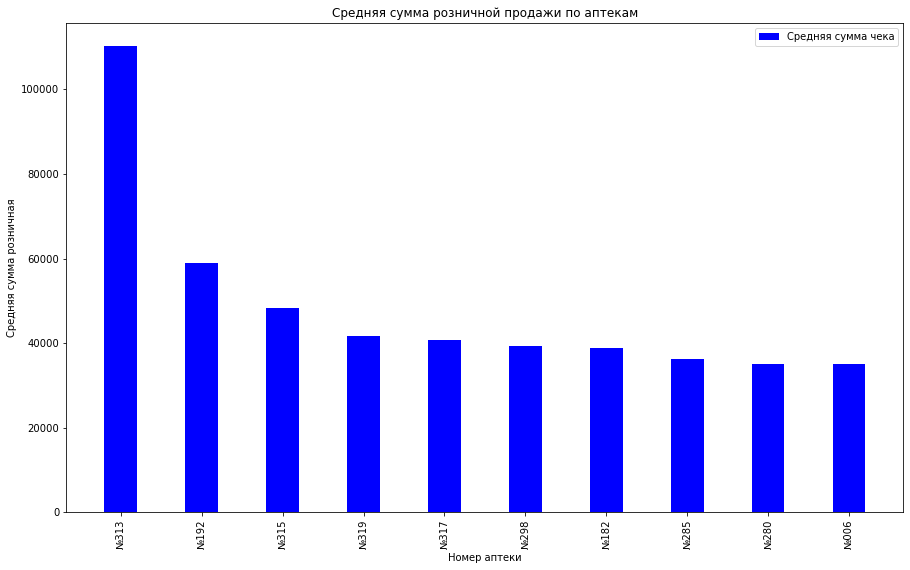

In [198]:

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем ось для графика
ax = plt.gca()

# Определяем ширину столбца
width = 0.4

# Создаем столбчатую диаграмму для средней розничной суммы
ax.bar(pivot_df['номер аптеки'], pivot_df[('сумма розничная', 'sum')], color='b', width=width, label='Средняя сумма чека', align='center')

# Устанавливаем метки для оси X с учетом сдвига
ax.set_xticks(pivot_df['номер аптеки'])
ax.set_xticklabels(pivot_df['номер аптеки'], rotation=90)

# Добавляем заголовок и метки осей
plt.title('Средняя сумма розничной продажи по аптекам')
ax.set_xlabel('Номер аптеки')
ax.set_ylabel('Средняя сумма розничная')

# Добавляем легенду
ax.legend()

# Отображаем диаграмму
plt.show()


In [199]:
join = product_of_the_day.merge(balances_as_of_April_30, on='код товара', how='left')
join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   код товара                    2068 non-null   object        
 1   статус товара                 2068 non-null   object        
 2   дата остатков                 2019 non-null   object        
 3   аптека                        2019 non-null   object        
 4   склад                         2019 non-null   object        
 5   товар                         2019 non-null   object        
 6   мнн                           1631 non-null   object        
 7   признак пку                   2019 non-null   float64       
 8   лек. средство                 2019 non-null   float64       
 9   жнвлс                         2019 non-null   float64       
 10  дозировка                     1424 non-null   object        
 11  фасовка                       

In [200]:
join = join.merge(pharmacy, on='номер аптеки', how='left')

join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   код товара                    2068 non-null   object        
 1   статус товара                 2068 non-null   object        
 2   дата остатков                 2019 non-null   object        
 3   аптека                        2019 non-null   object        
 4   склад                         2019 non-null   object        
 5   товар                         2019 non-null   object        
 6   мнн                           1631 non-null   object        
 7   признак пку                   2019 non-null   float64       
 8   лек. средство                 2019 non-null   float64       
 9   жнвлс                         2019 non-null   float64       
 10  дозировка                     1424 non-null   object        
 11  фасовка                       

In [201]:
pivot_df = join.pivot_table(index=['аптека', 'номер аптеки', 'территориальное управление'],
                            values=['общий остаток'],
                            aggfunc={'общий остаток': 'sum'}
                           )
#pivot_df = pivot_df.droplevel('СУММА РОЗНИЧНАЯ')
#pivot_df = pivot_df.rename(columns={('СУММА РОЗНИЧНАЯ', 'mean'): 'Средняя сумма чека'})
pivot_df.to_excel (r'C:\\Users\\Sergey\\остаток (Товар дня).xlsx')
pivot_df.reset_index(inplace=True)
pivot_df = pivot_df.sort_values(by='общий остаток', ascending=False)
pivot_df= pivot_df.head(10)
pivot_df

<ipython-input-201-c3406dcba4a5>:7: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pivot_df.to_excel (r'C:\\Users\\Sergey\\остаток (Товар дня).xlsx')


,аптека,номер аптеки,территориальное управление,общий остаток
251,"ГБУ МО «Мособлмедсервис» №313 Аптека МО, г. Ис...",№313,ТУ 6,167.0
273,"ГБУ МО «Мособлмедсервис» №337 Аптека МО, г. Дм...",№337,ТУ 7,138.0
255,ГБУ МО «Мособлмедсервис» №317 Аптечный_пункт М...,№317,ТУ 6,113.0
257,"ГБУ МО «Мособлмедсервис» №319 Аптека МО, г. Че...",№319,ТУ 5,110.0
157,ГБУ МО «Мособлмедсервис» №192 Аптечный_пункт М...,№192,ТУ 6,101.0
229,"ГБУ МО «Мособлмедсервис» №284 Аптека МО, г.Пущ...",№284,ТУ 5,91.0
59,"ГБУ МО «Мособлмедсервис» №070 Аптека МО, г. Ст...",№070,ТУ 5,79.0
252,ГБУ МО «Мособлмедсервис» №314 Аптечный_пункт г...,№314,ТУ 7,79.0
5,ГБУ МО «Мособлмедсервис» №006 Аптека г. Подоль...,№006,ТУ 5,77.0
253,"ГБУ МО «Мособлмедсервис» №315 Аптека МО, г.Эле...",№315,ТУ 2,77.0


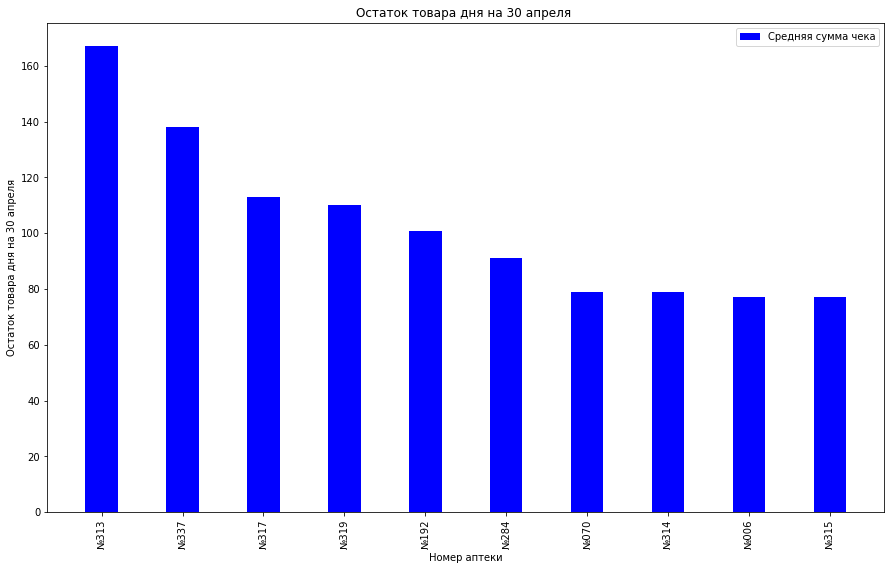

In [202]:

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем ось для графика
ax = plt.gca()

# Определяем ширину столбца
width = 0.4

# Создаем столбчатую диаграмму для средней розничной суммы
ax.bar(pivot_df['номер аптеки'], pivot_df['общий остаток'], color='b', width=width, label='Средняя сумма чека', align='center')

# Устанавливаем метки для оси X с учетом сдвига
ax.set_xticks(pivot_df['номер аптеки'])
ax.set_xticklabels(pivot_df['номер аптеки'], rotation=90)

# Добавляем заголовок и метки осей
plt.title('Остаток товара дня на 30 апреля ')
ax.set_xlabel('Номер аптеки')
ax.set_ylabel('Остаток товара дня на 30 апреля')

# Добавляем легенду
ax.legend()

# Отображаем диаграмму
plt.show()

# Задание 2

In [203]:
join = balances_as_of_April_30.merge(product_of_the_day, on='код товара', how='left')
join

,дата остатков,аптека,склад,код товара,товар,мнн,признак пку,лек. средство,жнвлс,дозировка,...,склад кому (для пмп),id_lot,контракт,признак киз,множитель,цена розничная за целую уп,описание места хранения,номер аптеки,организация,статус товара
0,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,9801408,NaN,0,1,300.0,NaN,№001,ГБУ МО «Мособлмедсервис»,Товар дня
1,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000337190,"*Лосьон - тоник с розмарином 100,0",NaN,0,0,0,NaN,...,NaN,9726194,NaN,0,1,300.0,NaN,№001,ГБУ МО «Мособлмедсервис»,Товар дня
2,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,313000000325277,*Масло какао 100 гр,NaN,0,0,0,NaN,...,NaN,9801410,NaN,0,1,371.0,NaN,№001,ГБУ МО «Мособлмедсервис»,Товар дня
3,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,1778958,L-Тироксин 75 Берлин-Хеми таб. 75мкг №100,Левотироксин натрия,0,1,1,75мкг,...,NaN,10138959,Договор от 21.12.2020 №15-ЛКПОД-20,1,1,137.6,"Хранить в сухом, защищенном от света, недоступ...",№001,ГБУ МО «Мособлмедсервис»,NaN
4,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №001 Аптечный пункт М...,4876328,Авиамарин таб. 50мг №10,Дименгидринат,0,1,0,50мг,...,NaN,10106778,Договор от 23.12.2020 №8-ЛКПОД-20,1,1,164.0,"В сухом, защищенном от света месте, при темпер...",№001,ГБУ МО «Мособлмедсервис»,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288271,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,4964438,Эффералган супп. рект. 80мг №12,Парацетамол,0,1,1,80мг,...,NaN,9661963,Договор от 21.12.2020 №6-ЛКПОД-20,0,1,98.8,"Хранить в сухом, защищенном от света, недоступ...",№347,ГБУ МО «Мособлмедсервис»,NaN
288272,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,1182188,Эхинацея настойка 50мл,Эхинацеи пурпурной травы экстракт,0,1,0,NaN,...,NaN,9928849,Договор от 10.01.2020 №8-АКОПЛ-20,0,1,130.0,"Хранить в сухом, защищенном от света, недоступ...",№347,ГБУ МО «Мособлмедсервис»,NaN
288273,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,7395398,Юнидокс солютаб таб. дисперг. 100мг №20,Доксициклин,0,1,1,100мг,...,NaN,10155957,Договор от 10.01.2020 №8-АКОПЛ-20,0,1,658.1,NaN,№347,ГБУ МО «Мособлмедсервис»,NaN
288274,2021-04-30T23:59:59.997,ГБУ МО «Мособлмедсервис» №347 Аптечный_пункт М...,ГБУ МО «МОСОБЛМЕДСЕРВИС» №347 Аптечный пункт М...,5274348,"Янтарная кислота Квадрат-С таб. 0,5г №10",NaN,0,0,0,NaN,...,NaN,10155576,Договор от 13.01.2020 №6-АКОПТ-20,0,1,11.0,NaN,№347,ГБУ МО «Мособлмедсервис»,NaN


In [204]:
join1 = join[join['статус товара']=='Товар дня']
join1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 288095
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   дата остатков                 2019 non-null   object        
 1   аптека                        2019 non-null   object        
 2   склад                         2019 non-null   object        
 3   код товара                    2019 non-null   object        
 4   товар                         2019 non-null   object        
 5   мнн                           1631 non-null   object        
 6   признак пку                   2019 non-null   int64         
 7   лек. средство                 2019 non-null   int64         
 8   жнвлс                         2019 non-null   int64         
 9   дозировка                     1424 non-null   object        
 10  фасовка                       2019 non-null   int64         
 11  форма выпуска                 163

In [205]:
# посчитаем количество остатков препаратов (товар дня) 

group1 = join1.groupby(['код товара', 'товар'])['количество'].sum().sort_values(ascending=False).reset_index()

group1

,код товара,товар,количество
0,2521238,Арбидол капс. 100мг №20,801.0
1,2080188,Фосфалюгель гель внутр. 20% 16г №20,708.0
2,4732388,Арбидол Максимум капс. 200мг №10,561.0
3,488885,*Протаргол раствор 2% 12 мл,412.0
4,2089448,Баралгин М таб. 500мг №20,361.0
5,2303798,Повязка Космопор Е/Cosmopor E steril 15х8см №2...,350.0
6,2041768,"Лазолван р-р д/ингал и внутрь 7,5мг/мл 100мл №1",308.0
7,2872148,Фестал таб. кш/раств п.о №40,296.0
8,6753518,Магне B6 таб. п.о №60,233.0
9,313000000323611,*Глюкоза порошок для глюкозотолерантного теста...,170.0


In [206]:
# Объединяем df с product_of_the_day по 'код товара' с правым соединением
join = df.merge(product_of_the_day, on='код товара', how='right')

# Фильтруем результаты по 'тип документа'
join2 = join[join['тип документа'] == 'ЧЕК ПРОДАЖИ']

# Рассчитываем долю каждой продажи в общей сумме розничных продаж

join2['доля продаж'] = join2['количество'] / join2['количество'].sum()
group2 = join2.groupby(['код товара']).agg({'доля продаж':sum,
                                            'количество':sum}).reset_index()

group2.rename(columns={'количество': 'количество проданных товаров'}, inplace=True)
# Отображаем результат
group2



<ipython-input-206-0732b83e6b6f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  join2['доля продаж'] = join2['количество'] / join2['количество'].sum()


,код товара,доля продаж,количество проданных товаров
0,1159628,0.001484,8.00
1,1287428,0.012611,68.00
2,1395578,0.002596,14.00
3,1631988,0.001669,9.00
4,1886158,0.001669,9.00
5,2041768,0.038388,207.00
6,2080188,0.059863,322.80
7,2089448,0.049886,269.00
8,2303798,0.003798,20.48
9,2303808,0.000831,4.48


In [207]:
join = group1.merge(group2, on='код товара', how='left')
join.rename(columns={'количество': 'остаток'}, inplace=True)
join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   код товара                    41 non-null     object 
 1   товар                         41 non-null     object 
 2   остаток                       41 non-null     float64
 3   доля продаж                   38 non-null     float64
 4   количество проданных товаров  38 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.7+ KB


<ipython-input-208-5302695a2cbf>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(join['код товара'], rotation=90)
<ipython-input-208-5302695a2cbf>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(join['код товара'], rotation=90)


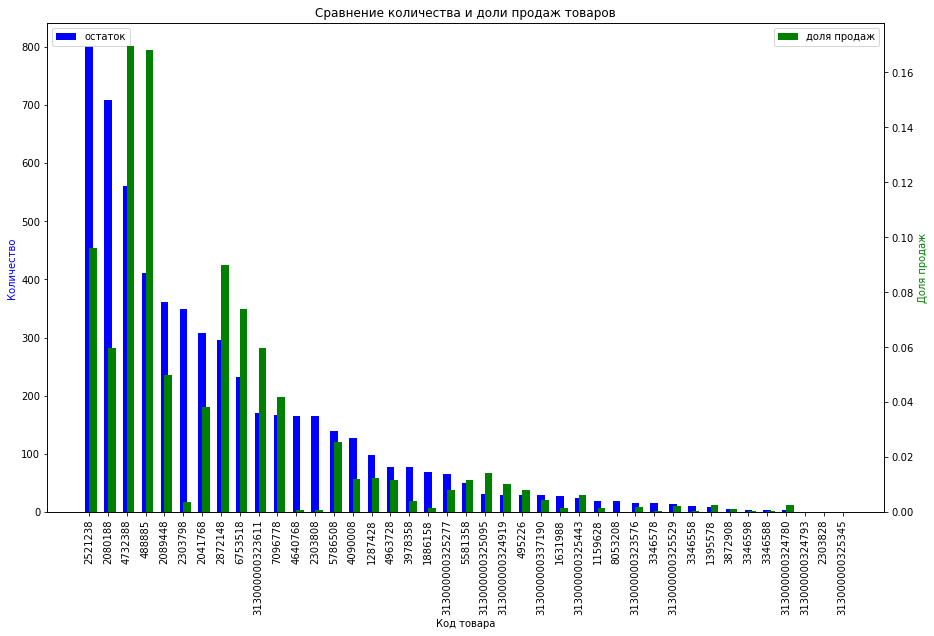

In [208]:
# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем первую столбчатую диаграмму
ax1 = plt.gca() # Получаем текущие оси
ax1.bar(join['код товара'], join['остаток'], color='b', width=0.4, label='остаток', align='center')
ax1.set_xticklabels(join['код товара'], rotation=90)

# Создаем вторую ось Y
ax2 = ax1.twinx()
# Смещаем столбцы 'доля продаж' на 0.4 вправо для предотвращения наложения
ax2.bar(join['код товара'], join['доля продаж'], color='g', width=0.4, alpha=1.0, label='доля продаж', align='edge')
ax2.set_xticklabels(join['код товара'], rotation=90)


# Добавляем заголовок и метки осей
plt.title('Сравнение количества и доли продаж товаров')
ax1.set_xlabel('Код товара')
ax1.set_ylabel('Количество', color='b')
ax2.set_ylabel('Доля продаж', color='g')



# Добавляем легенду
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Отображаем диаграмму
plt.show()

На закупку таких препаратов как:
    2521238, 2080188, 4732388, 488885, 2089448, 2041768,2872148,675318, 3100000032611, 7096778 нужно обратить особое внимание, т.к. доля продаж данных препаратов высока.

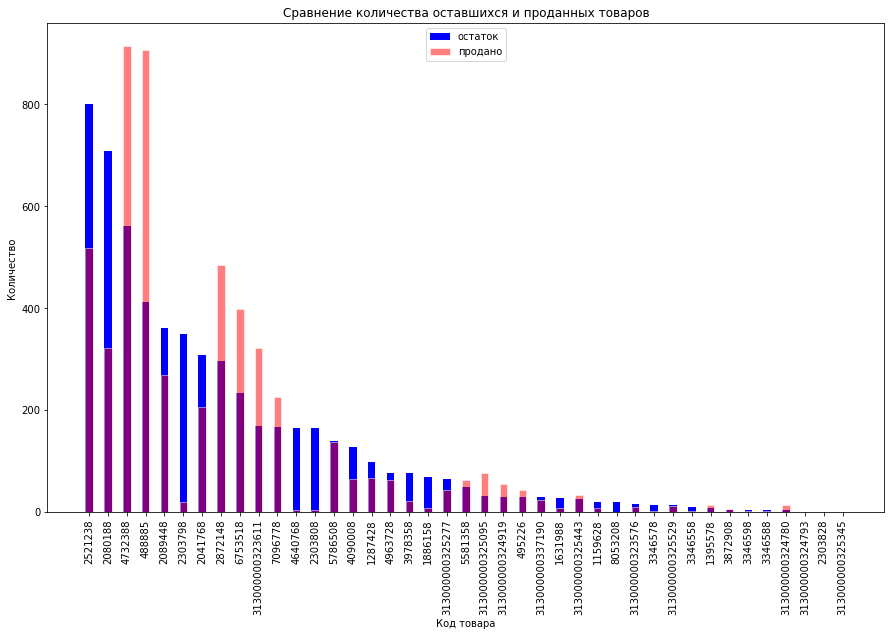

In [209]:
import matplotlib.pyplot as plt

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем ось для графика
ax = plt.gca()

# Определяем ширину столбца
width = 0.4

# Создаем столбчатую диаграмму для остатка
ax.bar(join['код товара'], join['остаток'], color='b', width=width, label='остаток', align='center')

# Создаем столбчатую диаграмму для количества проданных товаров, сдвигая ее на ширину столбца
ax.bar(join['код товара'], join['количество проданных товаров'], color='r', width=width, alpha=0.5, label='продано', align='center', edgecolor='white')

# Устанавливаем метки для оси X с учетом сдвига
ax.set_xticks(join['код товара'])
ax.set_xticklabels(join['код товара'], rotation=90)

# Добавляем заголовок и метки осей
plt.title('Сравнение количества оставшихся и проданных товаров')
ax.set_xlabel('Код товара')
ax.set_ylabel('Количество')

# Добавляем легенду
ax.legend()

# Отображаем диаграмму
plt.show()



Как видим исходя из анализа продаж за апрель, продажа таких препаратов как 4732388, 488885, 2872148, 675318, 313000000323611,7096778,313000000325095, 313000000324919, 495226,313000000325443, 313000000324780, превысили остатки на 30 апреля. На закупку этих препаратов нужно уделить внимание.

In [210]:
join['недостаток']=join['остаток']-join['количество проданных товаров']
join=join.sort_values('недостаток')
join.to_excel (r'C:\\Users\\Sergey\\Недостаток товара на следующий месяц.xlsx')

<ipython-input-210-46e59d5d774c>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  join.to_excel (r'C:\\Users\\Sergey\\Недостаток товара на следующий месяц.xlsx')


In [211]:
join

,код товара,товар,остаток,доля продаж,количество проданных товаров,недостаток
3,488885,*Протаргол раствор 2% 12 мл,412.0,0.168202,907.00,-495.00
2,4732388,Арбидол Максимум капс. 200мг №10,561.0,0.169500,914.00,-353.00
7,2872148,Фестал таб. кш/раств п.о №40,296.0,0.089943,485.00,-189.00
8,6753518,Магне B6 таб. п.о №60,233.0,0.073994,399.00,-166.00
9,313000000323611,*Глюкоза порошок для глюкозотолерантного теста...,170.0,0.059715,322.00,-152.00
10,7096778,Зодак капли внутр. 10мг/мл 20мл №1,167.0,0.041726,225.00,-58.00
21,313000000325095,"*Фурацилин раствор 0,02% 225,0",31.0,0.014094,76.00,-45.00
22,313000000324919,"*Хлоргексидин раствор 0,1% 200,0",30.0,0.010385,56.00,-26.00
23,495226,*Кольд-крем с эфирным маслом 50 гр,30.0,0.008160,44.00,-14.00
20,5581358,Салфетки влажные очищающие универсал алоэ-вит ...,50.0,0.011869,64.00,-14.00


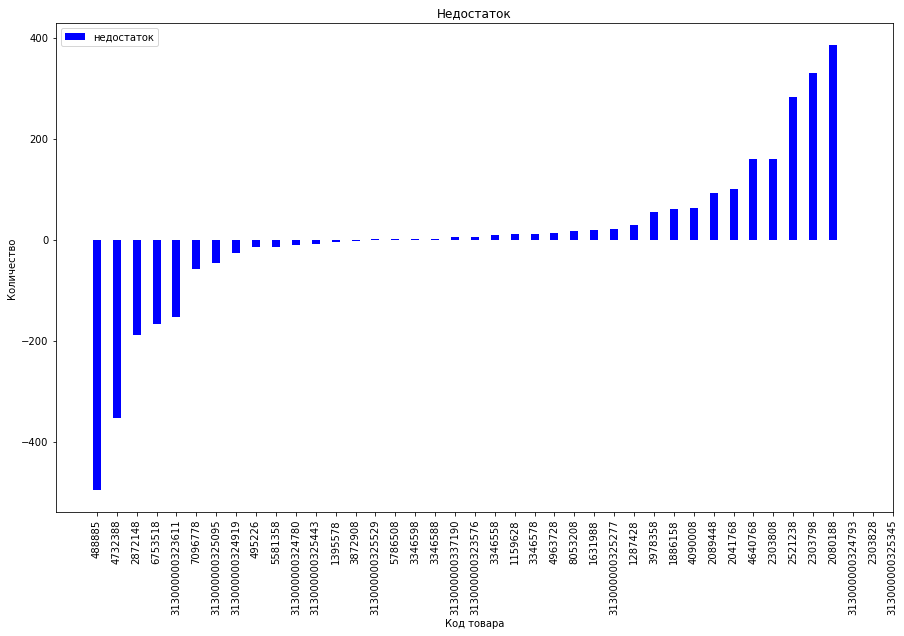

In [212]:

# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

# Создаем ось для графика
ax = plt.gca()

# Определяем ширину столбца
width = 0.4

# Создаем столбчатую диаграмму для остатка
ax.bar(join['код товара'], join['недостаток'], color='b', width=width, label='недостаток', align='center')

# Устанавливаем метки для оси X с учетом сдвига
ax.set_xticks(join['код товара'])
ax.set_xticklabels(join['код товара'], rotation=90)

# Добавляем заголовок и метки осей
plt.title('Недостаток')
ax.set_xlabel('Код товара')
ax.set_ylabel('Количество')

# Добавляем легенду
ax.legend()

# Отображаем диаграмму
plt.show()



# Задание 3

In [213]:
# по продажам

In [214]:

df['срок годности'] = pd.to_datetime(df['срок годности'], errors='coerce')
df = df.dropna(subset=['срок годности'])
df['срок годности'].unique()

<DatetimeArray>
['2025-04-01 00:00:00', '2022-10-01 00:00:00', '2024-06-01 00:00:00',
 '2024-09-01 00:00:00', '2021-10-01 00:00:00', '2025-07-01 00:00:00',
 '2023-06-01 00:00:00', '2024-02-01 00:00:00', '2024-10-01 00:00:00',
 '2023-11-01 00:00:00',
 ...
 '2025-04-10 00:00:00', '2024-04-22 00:00:00', '2024-04-09 00:00:00',
 '2025-07-25 00:00:00', '2040-12-31 00:00:00', '2025-11-03 00:00:00',
 '2024-04-20 00:00:00', '2021-06-25 00:00:00', '2025-08-26 00:00:00',
 '2021-08-28 00:00:00']
Length: 1568, dtype: datetime64[ns]

In [215]:
df['срок годности']

0        2025-04-01
1        2022-10-01
2        2025-04-01
3        2024-06-01
4        2024-09-01
            ...    
682262   2024-07-01
682263   2022-04-01
682264   2025-07-01
682265   2022-08-01
682266   2022-07-01
Name: срок годности, Length: 682261, dtype: datetime64[ns]

In [216]:
df['текущая дата']='2021-04-30'
df['текущая дата']=pd.to_datetime(df['текущая дата'], errors='coerce')
df.info()

<ipython-input-216-9d102a238b19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['текущая дата']='2021-04-30'
<ipython-input-216-9d102a238b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['текущая дата']=pd.to_datetime(df['текущая дата'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 682261 entries, 0 to 682266
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   аптека                        682261 non-null  object        
 1   склад                         682261 non-null  object        
 2   покупатель                    682261 non-null  object        
 3   номер документа               682261 non-null  object        
 4   тип документа                 682261 non-null  object        
 5   дата документа                682261 non-null  datetime64[ns]
 6   время документа               682261 non-null  float64       
 7   код товара                    682261 non-null  object        
 8   название товара               682261 non-null  object        
 9   производитель                 682261 non-null  object        
 10  мнн                           505264 non-null  object        
 11  количество        

In [217]:
df['разница'] = df['срок годности'] - df['текущая дата']
df['разница_в_днях'] = df['разница'].dt.days
df['разница_в_днях']

<ipython-input-217-10f4bd5143d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['разница'] = df['срок годности'] - df['текущая дата']
<ipython-input-217-10f4bd5143d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['разница_в_днях'] = df['разница'].dt.days


0         1432
1          519
2         1432
3         1128
4         1220
          ... 
682262    1158
682263     336
682264    1523
682265     458
682266     427
Name: разница_в_днях, Length: 682261, dtype: int64

In [218]:
# Создаем столбец 'просрочка' с начальным значением 'Не просрочено'
df['просрочка'] = 'Не просрочено'

# Обновляем столбец 'просрочка' для просроченных продуктов
df.loc[df['разница_в_днях'] < 0, 'просрочка'] = 'Срок годности истек'
df.loc[(0 <= df['разница_в_днях']) & (df['разница_в_днях'] < 90), 'просрочка'] = 'Менее 90 дней'
df.loc[(90 <= df['разница_в_днях']) & (df['разница_в_днях'] < 120), 'просрочка'] = '90-120 дней'
df.loc[120 <= df['разница_в_днях'], 'просрочка'] = 'более 120 дней'

df['просрочка']

<ipython-input-218-c9e45679972d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['просрочка'] = 'Не просрочено'


0         более 120 дней
1         более 120 дней
2         более 120 дней
3         более 120 дней
4         более 120 дней
               ...      
682262    более 120 дней
682263    более 120 дней
682264    более 120 дней
682265    более 120 дней
682266    более 120 дней
Name: просрочка, Length: 682261, dtype: object

In [219]:
group1=df.groupby('просрочка')['покупатель'].count().sort_values(ascending=False).reset_index()
group1 = group1.rename(columns={'покупатель': 'количество'})
group1

,просрочка,количество
0,более 120 дней,676639
1,Менее 90 дней,3596
2,Срок годности истек,1073
3,90-120 дней,953


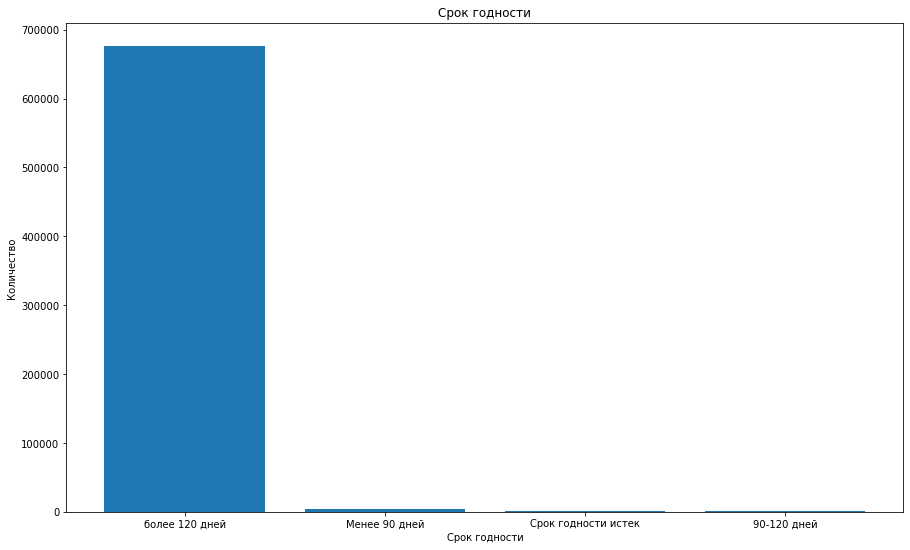

In [220]:
# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

plt.bar(group1['просрочка'], group1['количество'])

plt.title('Срок годности')
plt.xlabel('Срок годности')
plt.ylabel('Количество')

# Отображаем диаграмму
plt.show()

In [221]:
# по остатку

In [222]:
balances_as_of_April_30['срок годности'] = pd.to_datetime(balances_as_of_April_30['срок годности'], errors='coerce')
balances_as_of_April_30 = balances_as_of_April_30.dropna(subset=['срок годности'])

balances_as_of_April_30['текущая дата']='2021-04-30'
balances_as_of_April_30['текущая дата']=pd.to_datetime(balances_as_of_April_30['текущая дата'], errors='coerce')
balances_as_of_April_30.info()

<ipython-input-222-157fbbd399f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balances_as_of_April_30['текущая дата']='2021-04-30'
<ipython-input-222-157fbbd399f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balances_as_of_April_30['текущая дата']=pd.to_datetime(balances_as_of_April_30['текущая дата'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 288272 entries, 0 to 288275
Data columns (total 48 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   дата остатков                 288272 non-null  object        
 1   аптека                        288272 non-null  object        
 2   склад                         288272 non-null  object        
 3   код товара                    288272 non-null  object        
 4   товар                         288272 non-null  object        
 5   мнн                           233343 non-null  object        
 6   признак пку                   288272 non-null  int64         
 7   лек. средство                 288272 non-null  int64         
 8   жнвлс                         288272 non-null  int64         
 9   дозировка                     228471 non-null  object        
 10  фасовка                       288272 non-null  int64         
 11  форма выпуска     

In [223]:
balances_as_of_April_30['разница'] = balances_as_of_April_30['срок годности'] - balances_as_of_April_30['текущая дата']
balances_as_of_April_30['разница_в_днях'] = balances_as_of_April_30['разница'].dt.days
balances_as_of_April_30['разница_в_днях']

<ipython-input-223-da35a47cdb22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balances_as_of_April_30['разница'] = balances_as_of_April_30['срок годности'] - balances_as_of_April_30['текущая дата']
<ipython-input-223-da35a47cdb22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balances_as_of_April_30['разница_в_днях'] = balances_as_of_April_30['разница'].dt.days


0          160
1          152
2           48
3          611
4          884
          ... 
288271     336
288272     762
288273    1281
288274     580
288275     814
Name: разница_в_днях, Length: 288272, dtype: int64

In [224]:
# Создаем столбец 'просрочка' с начальным значением 'Не просрочено'
balances_as_of_April_30['просрочка'] = 'Не просрочено'

# Обновляем столбец 'просрочка' для просроченных продуктов
balances_as_of_April_30.loc[balances_as_of_April_30['разница_в_днях'] < 0, 'просрочка'] = 'Срок годности истек'
balances_as_of_April_30.loc[(0 <= balances_as_of_April_30['разница_в_днях']) & (balances_as_of_April_30['разница_в_днях'] < 90), 'просрочка'] = 'Менее 90 дней'
balances_as_of_April_30.loc[(90 <= balances_as_of_April_30['разница_в_днях']) & (balances_as_of_April_30['разница_в_днях'] < 120), 'просрочка'] = '90-120 дней'
balances_as_of_April_30.loc[120 <= balances_as_of_April_30['разница_в_днях'], 'просрочка'] = 'более 120 дней'

df['просрочка']

<ipython-input-224-c117599709f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balances_as_of_April_30['просрочка'] = 'Не просрочено'


0         более 120 дней
1         более 120 дней
2         более 120 дней
3         более 120 дней
4         более 120 дней
               ...      
682262    более 120 дней
682263    более 120 дней
682264    более 120 дней
682265    более 120 дней
682266    более 120 дней
Name: просрочка, Length: 682261, dtype: object

In [225]:
group2=balances_as_of_April_30.groupby('просрочка')['дата остатков'].count().sort_values(ascending=False).reset_index()
group2 = group2.rename(columns={'дата остатков': 'количество'})
group2
group2.to_excel (r'C:\\Users\\Sergey\\задание 3.xlsx')

<ipython-input-225-bafd0da1b957>:4: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  group2.to_excel (r'C:\\Users\\Sergey\\задание 3.xlsx')


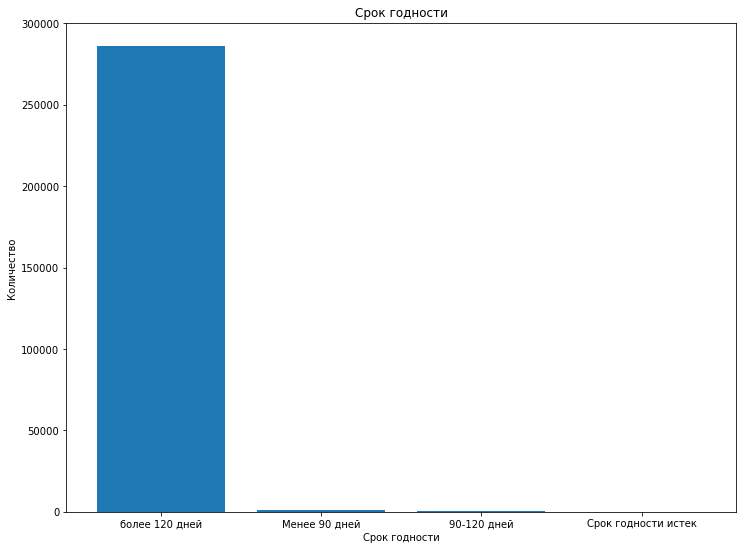

In [226]:
# Устанавливаем размер фигуры
plt.figure(figsize=(12, 9))

plt.bar(group2['просрочка'], group2['количество'])

plt.title('Срок годности')
plt.xlabel('Срок годности')
plt.ylabel('Количество')

# Отображаем диаграмму
plt.show()

# задание 4

In [227]:
pharmacy = pharmacy.rename(columns={'наименование аптеки': 'аптека'})
min_range_of_pharmacy_items = min_range_of_pharmacy_items.rename(columns={'лекарственные препараты (мнн)': 'мнн'})
min_range_of_pharmacy = min_range_of_pharmacy.rename(columns={'лекарственные препараты (мнн)': 'мнн'})

In [228]:
pharmacy001 = pharmacy[pharmacy['номер аптеки']=='№001']
pharmacy001

,аптека,территориальное управление,номер аптеки,статус,организация,адрес
0,ГБУ МО «Мособлмедсервис» №001 Аптечный_пункт М...,ТУ 3,№001,Аптечный_пункт,ГБУ МО «Мособлмедсервис»,"МО, г. Люберцы, ул. Назаровская, д.3"


In [229]:
pharmacy266 = pharmacy[pharmacy['номер аптеки']=='№266']
pharmacy266


,аптека,территориальное управление,номер аптеки,статус,организация,адрес
224,"ГБУ МО «Мособлмедсервис» №266 Аптека МО, г. Че...",ТУ 2,№266,Аптека,ГБУ МО «Мособлмедсервис»,"МО, г. Черноголовка, Школьный б-р, д. 9"


In [230]:
join = balances_as_of_April_30.merge(pharmacy, on = 'номер аптеки', how = 'left')
join = join[join['номер аптеки'] == '№001']
join = min_range_of_pharmacy_items.merge(join, on = 'мнн', how = 'left')

group=join.groupby('мнн')['количество'].sum().sort_values(ascending=False).reset_index()
group
group.to_excel (r'C:\\Users\\Sergey\\задание 4_1.xlsx')

<ipython-input-230-c574b4a0479a>:7: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  group.to_excel (r'C:\\Users\\Sergey\\задание 4_1.xlsx')


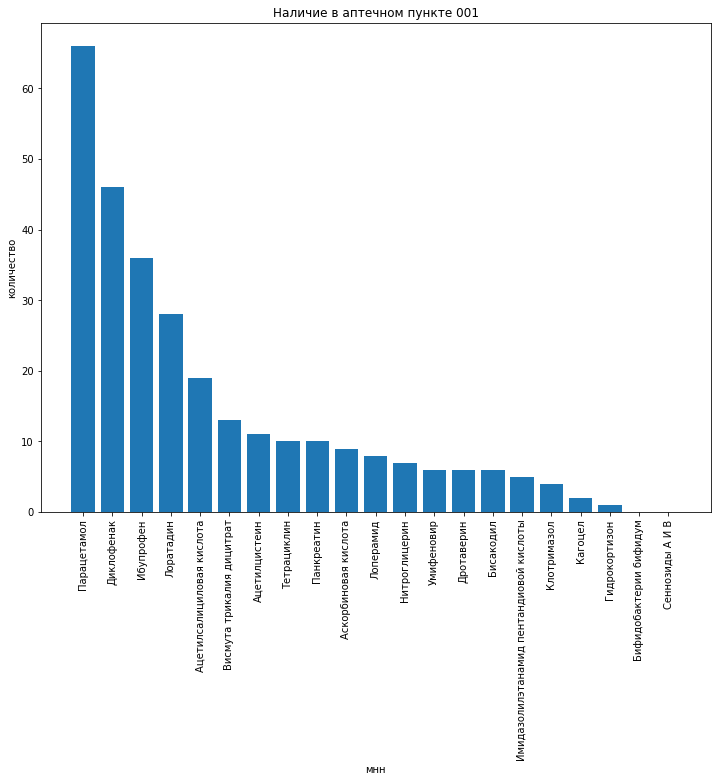

In [231]:
# Устанавливаем размер фигуры
plt.figure(figsize=(12, 9))

plt.bar(group['мнн'], group['количество'])

plt.title('Наличие в аптечном пункте 001')
plt.xlabel('мнн')
plt.ylabel('количество')

# Поворот надписей на оси x на 90 градусов
plt.xticks(rotation=90)

# Отображаем диаграмму
plt.show()

In [232]:
join = balances_as_of_April_30.merge(pharmacy, on = 'номер аптеки', how = 'left')
join = join[join['номер аптеки'] == '№266']
join = min_range_of_pharmacy.merge(join, on = 'мнн', how = 'left')

group=join.groupby('мнн')['количество'].sum().sort_values(ascending=False).reset_index()
group
group.to_excel (r'C:\\Users\\Sergey\\задание 4_2.xlsx')

<ipython-input-232-988f174711fb>:7: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  group.to_excel (r'C:\\Users\\Sergey\\задание 4_2.xlsx')


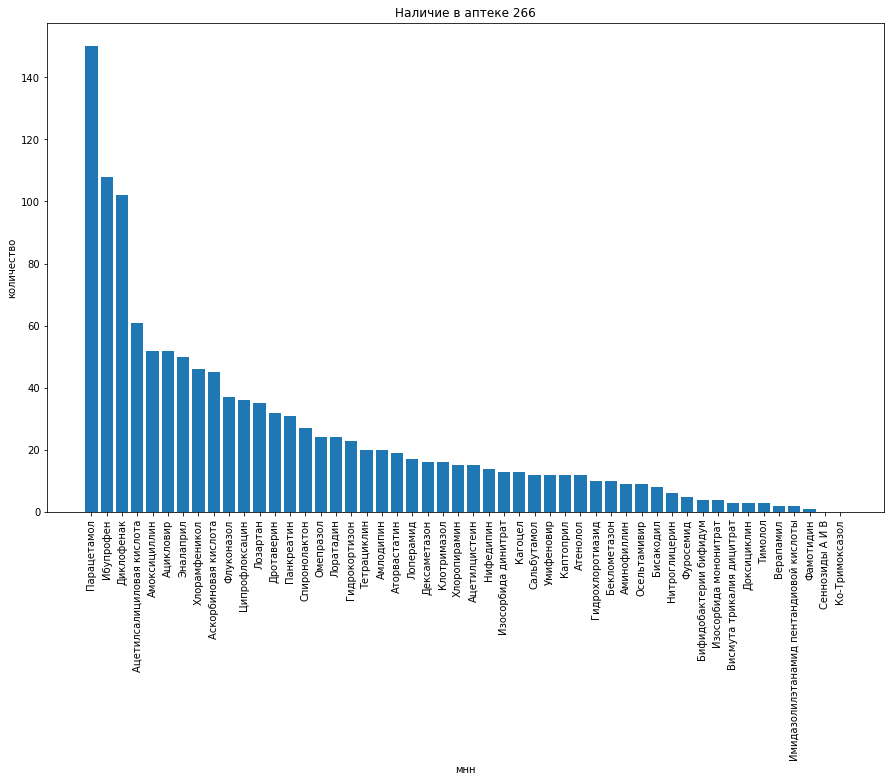

In [233]:
# Устанавливаем размер фигуры
plt.figure(figsize=(15, 9))

plt.bar(group['мнн'], group['количество'])

plt.title('Наличие в аптеке 266')
plt.xlabel('мнн')
plt.ylabel('количество')

# Поворот надписей на оси x на 90 градусов
plt.xticks(rotation=90)

# Отображаем диаграмму
plt.show()

# задание 5

In [240]:
columns_list = df.columns.tolist()
print(columns_list)

['аптека', 'склад', 'покупатель', 'номер документа', 'тип документа', 'дата документа', 'время документа', 'код товара', 'название товара', 'производитель', 'мнн', 'количество', 'сумма поставщика', 'сумма розничная', 'скидка', 'серия', 'срок годности', 'поставщик', 'категория товара в ефарме', 'подкатегория товара в ефарме', 'номер позиции документа', 'неликвид', 'наркотическое в-во', 'ставка ндс розничная', 'сумма ндс розничная', 'номер аптеки', 'организация', 'текущая дата', 'разница', 'разница_в_днях', 'просрочка']


In [241]:
df1=df[df['тип документа']=='ЧЕК ПРОДАЖИ']

In [242]:
df1['наценка'] = df1['сумма розничная'] - df1['сумма поставщика']
df1['стоимость упаковки'] = df1['сумма розничная']/df1['количество']
df1['наценка']

<ipython-input-242-78073aac929f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['наценка'] = df1['сумма розничная'] - df1['сумма поставщика']
<ipython-input-242-78073aac929f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['стоимость упаковки'] = df1['сумма розничная']/df1['количество']


96        12.630
97        12.630
98         1.392
99        10.613
100      -18.980
           ...  
682262    36.525
682263    14.206
682264     9.696
682265    15.880
682266    51.628
Name: наценка, Length: 681513, dtype: float64

In [243]:
# 

group=df1.groupby(['категория товара в ефарме', 'подкатегория товара в ефарме']).agg({'сумма поставщика':sum,
                                                                                     'сумма розничная':sum,
                                                                                    'наценка':sum,
                                                                                    'стоимость упаковки':'mean'}).reset_index()

group.to_excel (r'C:\\Users\\Sergey\\задание 5.xlsx')
group

<ipython-input-243-2b17480dcedd>:8: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  group.to_excel (r'C:\\Users\\Sergey\\задание 5.xlsx')


,категория товара в ефарме,подкатегория товара в ефарме,сумма поставщика,сумма розничная,наценка,стоимость упаковки
0,БАД,БАД - антиоксидантного действия,4.188331e+05,508462.44,89629.3182,167.162704
1,БАД,"БАД витамины,минералы,витаминоподобные вещества",1.597423e+06,1978643.49,381220.7686,94.399417
2,БАД,БАД влияющие на лактацию,9.336700e+02,1215.00,281.3300,303.750000
3,БАД,БАД для женщин,9.681365e+04,115924.89,19111.2357,633.781333
4,БАД,БАД для мужчин,4.854294e+04,57305.70,8762.7620,914.443103
...,...,...,...,...,...,...
320,Товары санитарии и личной гигиены,Дезинфицирующие средства (не лечебные),1.205585e+05,154716.77,34158.3087,51.568768
321,Товары санитарии и личной гигиены,Прокладки гигиенические,1.633234e+05,209477.95,46154.5959,121.513854
322,Товары санитарии и личной гигиены,"Салфетки влажные, ватные диски, палочки, полот...",1.478299e+05,195513.68,47683.7756,68.736335
323,Товары санитарии и личной гигиены,Тампоны,2.484473e+04,31595.85,6751.1201,184.642857


In [245]:
#топ 3 по количеству продаж
group = df1.groupby(['категория товара в ефарме', 'подкатегория товара в ефарме'])['количество'].sum().sort_values(ascending=False).reset_index()
group.to_excel (r'C:\\Users\\Sergey\\топ 3 по количеству продаж.xlsx')
group.head(3)

<ipython-input-245-9828e6bc01a9>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  group.to_excel (r'C:\\Users\\Sergey\\топ 3 по количеству продаж.xlsx')


,категория товара в ефарме,подкатегория товара в ефарме,количество
0,Изделия медицинского назначения,Маски лицевые защитные,111256.93
1,Изделия медицинского назначения,"Шприцы,иглы,системы д/переливания крови",61935.46
2,Изделия медицинского назначения,Пластыри,32551.37


In [246]:
#топ 3 по стоимости продаж
group = df1.groupby(['категория товара в ефарме', 'подкатегория товара в ефарме'])['сумма розничная'].sum().sort_values(ascending=False).reset_index()
group.to_excel (r'C:\\Users\\Sergey\\топ 3 по стоимости продаж.xlsx')
group.head(3)

<ipython-input-246-0aaabe5ef3df>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  group.to_excel (r'C:\\Users\\Sergey\\топ 3 по стоимости продаж.xlsx')


,категория товара в ефарме,подкатегория товара в ефарме,сумма розничная
0,Лек. средства,Нейротропные ср-ва.Ноотропы,5777943.82
1,Лек. средства,Ненаркотические анальгетики.Прочие,4642984.29
2,Лек. средства,Гематотропные ср-ва.Антикоагулянты,4198802.98
